## **<font color='darkgreen'>Projeto de Processamento de Linguagem Natural - Mineração de Textos</font>**

## **<font color='darkgreen'>Livro: "The Sun Also Rises" (1926), de Ernest Hemingway</font>**

## **<font color='darkgreen'>Autora do Projeto: Fran Mateus</font>**

#### **<font color='orange'>OBJETIVO DO PROJETO</font>**

Analisar o texto do romance *The Sun Also Rises* (O Sol Também Se Levanta) usando técnicas de mineração de textos para identificar insights a partir das palavras escolhidas pelo autor e os sentimentos - positivos ou negativos - associados a elas.

#### **<font color='orange'>METODOLOGIA APLICADA: CRISP-DM</font>**

*Cross Industry Standard Process for Data Mining* (Processo Padrão Inter-Indústrias para Mineração de Dados)

**Etapas:**
- *Business Understanding*: entendimento do problema de negócio a ser resolvido;
- *Data Understanding*: entendimento e compreensão dos dados necessários, disponíveis ou a serem coletados externamente;
- *Data Preparation*: mineração do texto disponível para adequá-lo às necessidades da fase de modelagem;
- *Modeling*: modelagem dos dados já tratados com técninas de Processamento de Linguagem Natural (PLN);
- *Evaluation*: avaliação dos modelos construídos usando técnicas de visualização de dados;
- *Deployment*: implantação do modelo para uso na mineração, análise e modelagem de novos textos.

#### **<font color='orange'>TÉCNICAS DE MINERAÇÃO DE TEXTOS UTILIZADAS</font>**

- *Wordclouds* (Nuvem de Palavras) para decobrirmos quais palavras foram mais usadas no texto;
- *Análise de Sentimentos* para classificarmos os sentimentos associados a cada palavra como *positivo* ou *negativo*; 
- *Escore de Sentimentos* para descobrirmos a intensidade dos sentimentos usando uma escala de -5 até 5;
- *Word Pairs* (Pares de Palavras) para identificarmos as conexões - em pares - entre as palavras do texto. 

#### **<font color='orange'>BIBLIOTECAS E FUNÇÕES NECESSÁRIAS</font>**

In [1]:
# Bibliotecas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

# Funções para Wordclouds:
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

# Funções para Análise e Escore de Sentimentos:
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
nltk.download('stopwords', quiet=True)
nltk.download('opinion_lexicon', quiet=True)
nltk.download('punkt', quiet=True)
plt.style.use('ggplot')

# Função para Escore de Sentimentos:
from afinn import Afinn

# Biblioteca e função para Word Pairs:
import networkx as nx
from nltk import ngrams

#### **<font color='orange'>COLETA DOS DADOS TEXTUAIS</font>**

O texto de *The Sun Also Rises* encontra-se em domínio público e foi coletado do site Project Gutenberg:
https://www.gutenberg.org/cache/epub/67138/pg67138.txt

In [2]:
df = pd.read_csv('The-Sun-Also-Rises-by-EH/The-Sun-Also-Rises.txt',sep='\t')\
    .dropna()

df.head()

,text
0,THE SUN ALSO RISES by Ernest Hemingway
1,Robert Cohn was once middleweight boxing champ...
2,think that I am very much impressed by that as...
3,meant a lot to Cohn. He cared nothing for boxi...
4,"it, but he learned it painfully and thoroughly..."


#### **<font color='darkgreen'>I - WORDCLOUDS</font>**

A nuvem de palavras exibirá quais palavras foram mais usadas por Ernest Hemingway em seu romance. Nela, quanto mais um termo aparecer, maior será o seu tamanho.

#### **Preparação do texto:**

In [3]:
dfw = df

textoEH = dfw['text']
texto_Hem = " ".join(w for w in textoEH)
stopwordsw = set(STOPWORDS)

*Stopwords* são palavras consideradas neutras e pouco relevantes para a análise textual; por isso, elas serão excluídas da base de dados.

#### **Criação de wordcloud com todas as palavras do texto, exceto as *stopwords*:**

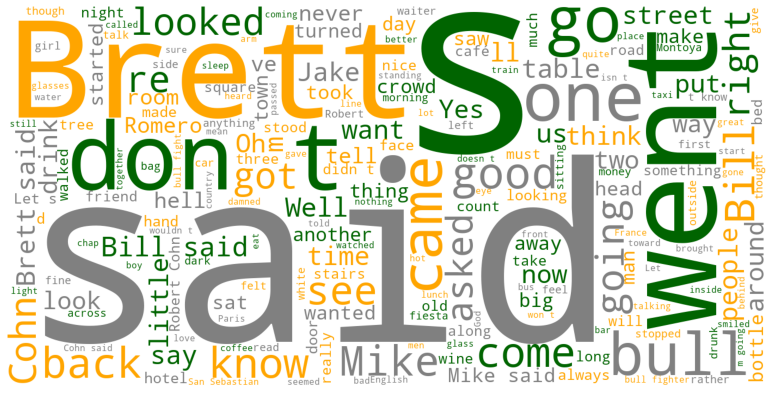

In [4]:
def plot_wordcloud(wordcloud):
    fig, ax = plt.subplots(figsize=(14,7))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_axis_off()
    plt.imshow(wordcloud)      
    
colors = ['darkgreen', 'orange', 'gray']
meu_cmap = ListedColormap(sns.color_palette(colors).as_hex())

wordcloud = WordCloud(stopwords=stopwordsw,
                      colormap=meu_cmap,
                      background_color='white',
                      width=1400,
                      height=700).generate(texto_Hem)

plot_wordcloud(wordcloud)

#### **Wordcloud com as 30 palavras mais frequentes:**

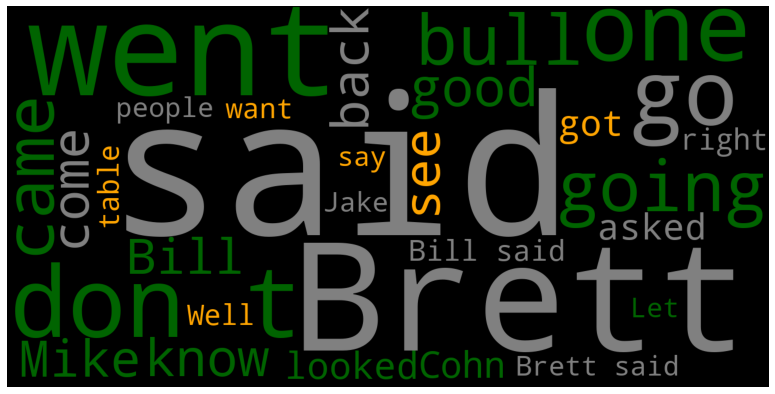

In [5]:
# Remoção de palavras irrelevantes, como letras isoladas presentes no texto:
stopwordsw.update(["re", "us", "m", "S", "ll"])

# Limitação da quantidade de palavras para as 30 mais frequentes:
wordcloud = WordCloud(stopwords=stopwordsw,
                      max_words=30,
                      colormap=meu_cmap,
                      background_color='black',
                      width=1400,
                      height=700).generate(texto_Hem)


def plot_wordcloud(wordcloud):
    fig, ax = plt.subplots(figsize=(14,7))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_axis_off()
    plt.imshow(wordcloud)

    
colors = ['green', 'orange', 'gray']
meu_cmap = ListedColormap(sns.color_palette(colors).as_hex())


plot_wordcloud(wordcloud)

#### **<font color='orange'>Insights:</font>** 
A wordcloud nos permitiu ter um primeiro contato visual com o texto de *The Sun Also Rises*. Através dela, descobrimos que as palavras mais usadas pelo autor foram:
- nomes de pessoas (*Brett, Bill, Cohn e Mike*);
- verbos no passado (com destaque para *said e went, looked e asked*) e no presente (*don´t, come, see, go e going*);
- substantivos (*bull e table*);
- além de adjetivos (como *good*) e advébios (como *well*). 

Combinados, esses termos nos dão a indicação de que esse texto pode ser um romance literário (como de fato é), com destaque para a personagem de Brett; e que o autor fala sobre touros com certa frequência.

 #### **<font color='darkgreen'>II - ANÁLISE DE SENTIMENTOS USANDO OPINION LEXICON</font>**

A análise de sentimentos é uma técnica que permite a rápida identificação de opiniões e intenções de um autor para com o seu texto através da classificação da polaridade das palavras contidas nele em *positivas*, *negativas* ou *neutras*.

#### **Preparação do texto:**

In [6]:
df1 = df

# Limpeza e tokenização:
def clean_text(text):
    text = text.lower()
    text = text.replace("'", '')
    text = re.sub(r'[^\w]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text

df1['text'] = df1['text'].map(clean_text) 
df1['text'] = df1['text'].map(word_tokenize)

df1.head()

,text
0,"[the, sun, also, rises, by, ernest, hemingway]"
1,"[robert, cohn, was, once, middleweight, boxing..."
2,"[think, that, i, am, very, much, impressed, by..."
3,"[meant, a, lot, to, cohn, he, cared, nothing, ..."
4,"[it, but, he, learned, it, painfully, and, tho..."


In [7]:
df2 = df1.text.explode().to_frame('token')
df2.head()

,token
0,the
0,sun
0,also
0,rises
0,by


In [8]:
# Quantidade de palavras por token:
df2.token.value_counts().head()

the    4485
i      2335
and    2290
to     1590
a      1534
Name: token, dtype: int64

Nota-se que as palavras consideradas *Stopwords* (por exemplo, os artigos definido *the* e indefinido *a*) estão dominando o texto. Por não serem informativas ou relevantes para essa análise textual, elas serão removidas da base de dados.

In [9]:
df2.shape

(70396, 1)

In [10]:
# Remoção das *stopwords*:
stopwords_a = set(stopwords.words('english'))

df2 = df2[~df2.token.isin(stopwords_a)]

df2.token.value_counts().head()

said     966
brett    432
bill     344
went     298
one      262
Name: token, dtype: int64

In [11]:
df2.shape

(32215, 1)

Com a exclusão das stopwords, a quantidade de palavras foi reduzida em 54% (de 70.396 para 32.215 termos).

#### **Classificação binária dos sentimentos:**

In [12]:
sentiment_lexicon = {
    **{w: 'positivo' for w in opinion_lexicon.positive()},
    **{w: 'negativo' for w in opinion_lexicon.negative()}
}

df2['sentiment'] = df2['token'].map(sentiment_lexicon)
df2 = df2[~df2.sentiment.isna()] 

df2.head()

,token,sentiment
1,champion,positivo
2,impressed,positivo
3,disliked,negativo
4,painfully,negativo
5,inferiority,negativo


Nota-se que existe coerência na classificação das palavras acima de acordo com o sentimento que elas representam. Por exemplo, *champion* (campeão) e *impressed* (impressionado) têm conotação positiva, enquanto que *painfully* (dolosoramente) e *inferiority* (inferioridade) refletem sentimentos negativos.

In [13]:
# Quantidade de palavras por token:
df2.token.value_counts().head()

good     232
like     223
right    130
well     120
hell      86
Name: token, dtype: int64

In [14]:
# Quantidade e proporção de cada sentimento:
summary_df2 = df2.sentiment.value_counts().to_frame('n')
summary_df2['prop'] = summary_df2['n'] / summary_df2.n.sum()

summary_df2.round(3)

,n,prop
positivo,1926,0.554
negativo,1551,0.446


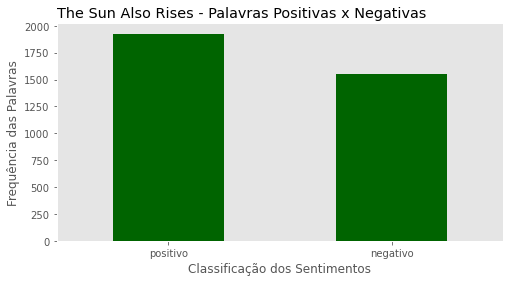

In [15]:
# Visualização gráfica da clássificação binária de sentimentos:
summary_df2.n.plot.bar(legend=False, figsize=(8, 4), grid=False, color='darkgreen')
plt.xlabel('Classificação dos Sentimentos')
plt.ylabel('Frequência das Palavras')
plt.title('The Sun Also Rises - Palavras Positivas x Negativas', loc='left')
plt.xticks(rotation=0);

#### **<font color='orange'>Insights:</font>** 
- *The Sun Also Rises* possui 55% de seu texto constituido de palavras positivas, o que nos permite deduzir que essa história, apesar dos 45% de termos negativos, tende a ser mais otimista do que pessimista.
- Para melhorar essa análise, criaremos um escore de sentimentos.

 #### **<font color='darkgreen'>III - ESCORE DE SENTIMENTOS USANDO AFINN</font>**

A escoragem dos sentimentos nos permite entender o quanto as palavras de um texto são positivas ou negativas; ou seja, a força do sentimento aplicado a cada uma delas. Para isso, usaremos o pacote AFINN, que medirá a intensidade das palavras numa escala que varia de -5 (muito negativa) até 5 (muito positiva).

#### **Criação do escore de sentimentos das palavras:**

In [16]:
# Adicionando linhas numeradas para divisão do texto em seções:
df2['line'] = range(1, len(df2) + 1)

df2.head()

,token,sentiment,line
1,champion,positivo,1
2,impressed,positivo,2
3,disliked,negativo,3
4,painfully,negativo,4
5,inferiority,negativo,5


In [17]:
afinn_scorer = Afinn()

# Exclusão das palavras com escore 0 (neutro).
df2['score'] = df2['token'].map(afinn_scorer.score).astype(int)
df2 = df2[df2['score'] != 0]

score_freq = df2.score.value_counts().sort_index().to_frame('n')

score_freq

,n
-5,6
-4,134
-3,269
-2,428
-1,144
1,109
2,574
3,578
4,88


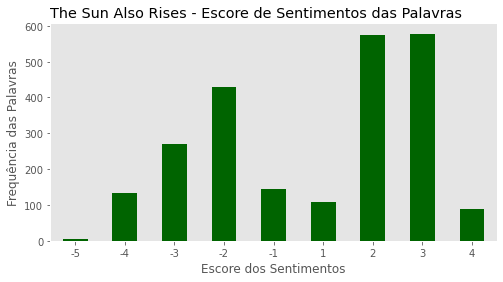

In [18]:
# Visualização gráfica do escore de sentimento das palavras:
score_freq.plot.bar(
    legend=False,
    figsize=(8, 4),
    grid=False,
    color='darkgreen')
plt.xlabel('Escore dos Sentimentos')
plt.ylabel('Frequência das Palavras')
plt.title('The Sun Also Rises - Escore de Sentimentos das Palavras', loc='left')
plt.xticks(rotation=0);

O gráfico mostra a predominância de palavras nos escores 2 e 3, indicando a presença de sentimentos mais positivos do que negativos, apesar do volume de palavras com escores -2 e -3.

#### **Escore de sentimentos do Arco Narrativo da estória:**

In [19]:
# Divisão do texto em seções de 100 linhas/cada:
score_acc = df2.groupby(df2['line'] // 100)\
    .score.mean()\
    .to_frame('score')\
    .rename_axis('section')

score_acc.head(10)

,score
section,
0,0.652174
1,0.250000
2,0.577465
3,0.776119
4,0.791045
5,-0.075000
6,1.362500
7,0.859375
8,1.205479


Um gráfico do escore de sentimentos do Arco Narrativo nos permitirá visualizar como que o texto, em termos de distribuição de palavras negativas e positivas, foi desenvolvido.

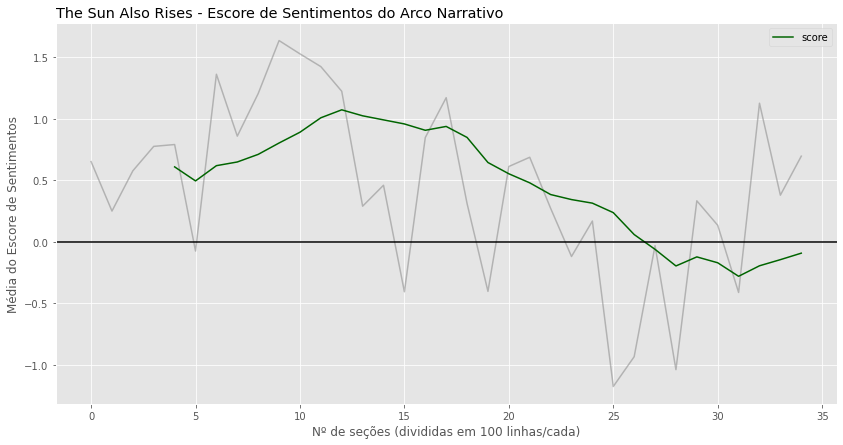

In [20]:
# Visualização gráfica do escore de sentimentos ao longo do arco narrativo:
ax = score_acc.plot.line(legend=False, figsize=(14, 7), grid=False, alpha=0.5, color='gray')
score_acc.rolling(10, min_periods=5).mean().plot.line(ax=ax, color='darkgreen')
plt.xlabel('Nº de seções (divididas em 100 linhas/cada)')
plt.ylabel('Média do Escore de Sentimentos')
plt.title('The Sun Also Rises - Escore de Sentimentos do Arco Narrativo', loc='left')
plt.axhline(0, color='black')
plt.xticks(rotation=0);

No gráfico:
- A **linha vermelha** delimita o ponto 0.0 e separa o escore positivo do negativo.

- A **linha cinza** representa a média do escore de sentimento de cada seção (com 100 linhas de texto/cada) e mostra que as palavras positivas se destacaram ao longo de todo o texto, apesar do final com concentração de termos negativos;

- A **linha verde** representa a média móvel do escore das mais de 35 seções exibidas no gráfico. Ela começa positiva (com escore acima de 0.5) e assim se manteve até a seção 27, aproximadamente. A partir dali, o texto assumiu escores negativos até o seu final.

#### **<font color='orange'>Insights:</font>** 
- Combinando a análise e o escore dos sentimentos do texto de Hemingway, pode-se observar que os 55% de palavras positivas usadas por ele, com predominância dos escores 2 e 3, foram concentrados nos dois terços iniciais do arco narrativo (seções 0 - 27).
- Quanto às palavras negativas (com destaque para os escores -2 e -3), elas se mostraram mais presentes da seção 27 até final, indicando que, apesar do tom positivo ao longo da história, a conclusão de *The Sun Also Rises* tende a ser dramática.

#### **<font color='darkgreen'>IV - PARES DE PALAVRAS USANDO NETWORKX</font>**

A técnica de *Pares de Palavras*, também chamada de *Bigramas*, é usada na decoberta de associações entre as palavras de um texto, dando uma ideia de como as frases dele foram construídas.

#### **Criação dos pares de palavras:**

In [21]:
df4 = df1

# Agrupando as palavras em duplas:
df4['wordpairs'] = df4['text'].map(lambda x: list(ngrams(x, 2)))
df4 = df4.explode('wordpairs')

df4.head()

,text,wordpairs
0,"[the, sun, also, rises, by, ernest, hemingway]","(the, sun)"
0,"[the, sun, also, rises, by, ernest, hemingway]","(sun, also)"
0,"[the, sun, also, rises, by, ernest, hemingway]","(also, rises)"
0,"[the, sun, also, rises, by, ernest, hemingway]","(rises, by)"
0,"[the, sun, also, rises, by, ernest, hemingway]","(by, ernest)"


In [22]:
# Frequência dos pares de palavras:
df4['wordpairs'].value_counts().head(6)

(of, the)    424
(in, the)    405
(don, t)     278
(on, the)    259
(i, said)    252
(to, the)    241
Name: wordpairs, dtype: int64

In [23]:
# Separando as palavras em 2 colunas para remoção de stopwords: 
df4 = pd.DataFrame(df4.wordpairs.values.tolist(), columns=['word1', 'word2']).dropna()

# Remoção das stopwords:
en_stopwords = set(stopwords.words('english'))

df4 = df4[~(df4.word1.isin(en_stopwords) | df4.word2.isin(en_stopwords))]

df4.head()

,word1,word2
1,sun,also
2,also,rises
5,ernest,hemingway
6,robert,cohn
10,middleweight,boxing


In [24]:
# Classificando as Word Pairs pela frequência delas no texto:
df4 = df4.groupby(['word1', 'word2'])\
    .size()\
    .to_frame('n')\
    .reset_index()\
    .sort_values('n', ascending=False)

In [25]:
# Restrigindo os pares para as palavras que aparecem mais de 10 vezes juntas:
df4[df4.n > 10].head(10)

,word1,word2,n
643,bill,said,127
837,brett,said,115
4130,mike,said,85
5316,robert,cohn,55
1329,cohn,said,36
5580,san,sebastian,33
5476,said,bill,30
929,bull,fight,30
5478,said,brett,29
930,bull,fighter,28


#### **Visualização gráfica dos pares de palavras:**

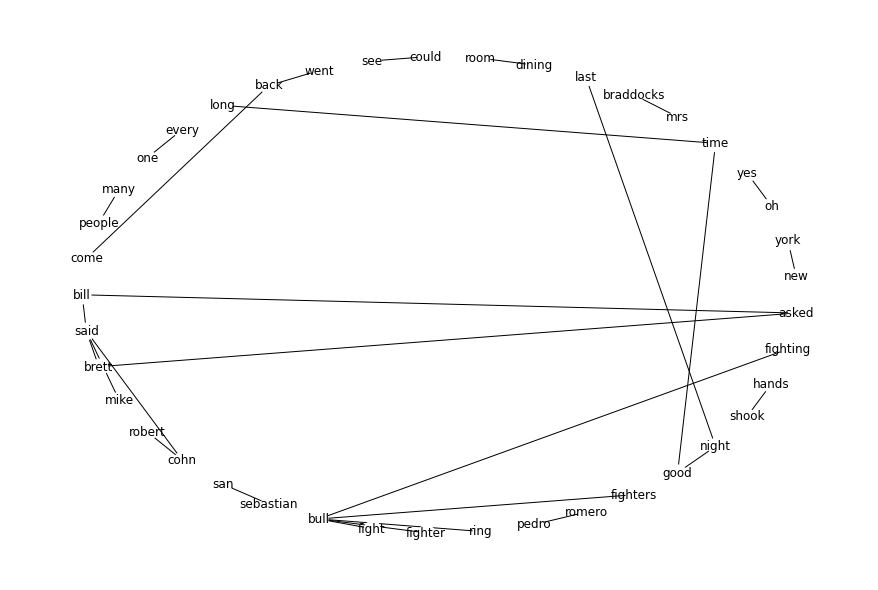

In [26]:
Conexoes = nx.from_pandas_edgelist(df4[df4.n > 10], 'word1', 'word2')
plt.figure(figsize=(12, 8))
nx.draw_shell(Conexoes, with_labels=True, node_color='white', font_size=12)

#### **<font color='orange'>Insights:</font>** 
- O gráfico acima mostra as palavras que aparecem juntas, mais vezes, no texto de *The Sun Also Rises*. 
- Entre os 5 bigramas mais frequentes na obra, todos estão relacionados a algo que os personagens falaram (*Bill said, Brett said, Mike said* e *Cohn said)*. 
- O personagem de Robert Cohn tem muita relevância nessa narrativa. 
- Quem conhece essa obra de Hemingway, sabe que o personagem de Jake Barnes narra a história dele e de seus amigos expatriados Cohn, Bill, Brett e Mike, em cidades europeias (entre elas, *San Sebastian*).
- O texto também destaca as lutas entre bois e toureiros (pares de palavras *bull fight* e *bull fighters*).